In [1]:
# Do the necessary imports
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import IBMQ, Aer, transpile, assemble
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex
from qiskit.extensions import Initialize
from qiskit.ignis.verification import marginal_counts
from qiskit.quantum_info import random_statevector


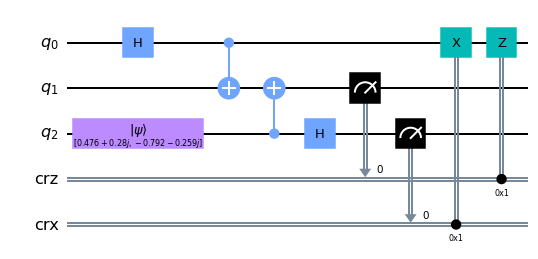

In [2]:
  # We want to teleport a random quantum state:
psi = random_statevector(2)
  # Initialise content of our quantum computer
qr = QuantumRegister(3, name="q")    # Protocol uses 3 qubits
crz = ClassicalRegister(1, name="crz") # and 2 classical bits
crx = ClassicalRegister(1, name="crx") # in 2 different registers
teleportation_circuit = QuantumCircuit(qr, crz, crx)
teleportation_circuit.initialize(psi, 2)
  # Apply Hadamard gate to the first qubit (0)
teleportation_circuit.h(0)
  # Apply cNOT gate with first as a control
teleportation_circuit.cx(0,1)
  # Now we apply the reverse (decoder) to the second and third qubits
teleportation_circuit.cx(2,1)
teleportation_circuit.h(2)  # Is this the only order we can apply this?
  # Now Bob measures both his qubits (1 and 2) and sends results to Alice (0)
teleportation_circuit.measure(1,0)
teleportation_circuit.measure(2,1)
  # Now Alice applies gates depending on Bobs outcomes
teleportation_circuit.x(0).c_if(crx, 1) # Apply gates if the registers 
teleportation_circuit.z(0).c_if(crz, 1)
teleportation_circuit.draw('mpl')

In [7]:
sim = Aer.get_backend('qasm_simulator')
teleportation_circuit.save_statevector()
#c_compiled = transpile(teleportation_circuit, sim)
#job = sim.run(c_compiled, shots = 100)
result = sim.run(teleportation_circuit, shots = 1000).result()
out_vector = result.get_statevector()
counts = result.get_counts(teleportation_circuit)
plot_bloch_multivector(out_vector)


Simulation failed and returned the following error message:
ERROR: Failed to load qobj: Duplicate key "statevector" in save instruction.


QiskitError: 'You have to select a circuit or schedule when there is more than one available'

C:\Users\nadee\anaconda3\envs\MyQuisKitEnv\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


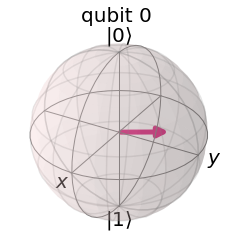

In [6]:
plot_bloch_multivector(psi)

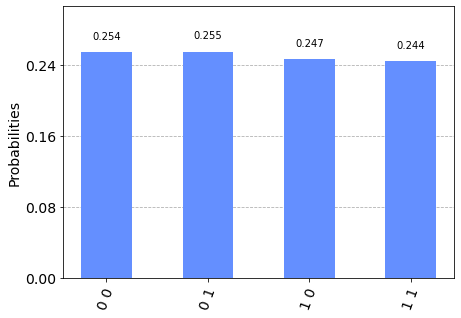

In [ ]:
plot_histogram(counts)